# [3조] 이슈에 따른 월별 중국과 일본 관광객 변화
## - 그래프 시각화를 통한 비교분석을 중심으로

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

# 한글 출력(colab 용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 깨짐 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,521 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

### 1. 목적별 국적별 입국통계 분석 (기간: 2015년 1월 ~ 2020년 11월)

In [3]:
pur_nat = pd.read_excel('./purpose_nationality.xls')
pur_nat

,국적,목적,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,2015년10월,2015년11월,2015년12월,2016년01월,2016년02월,2016년03월,2016년04월,2016년05월,2016년06월,2016년07월,2016년08월,2016년09월,2016년10월,2016년11월,2016년12월,2017년01월,2017년02월,2017년03월,2017년04월,2017년05월,2017년06월,2017년07월,2017년08월,2017년09월,2017년10월,2017년11월,2017년12월,2018년01월,2018년02월,2018년03월,2018년04월,2018년05월,2018년06월,2018년07월,2018년08월,2018년09월,2018년10월,2018년11월,2018년12월,2019년01월,2019년02월,2019년03월,2019년04월,2019년05월,2019년06월,2019년07월,2019년08월,2019년09월,2019년10월,2019년11월,2019년12월,2020년01월,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월,계
0,NaN,NaN,인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명),인원(명)
1,아시아주,관광,627125,729714,820617,951922,915368,401795,301749,615681,772470,910446,779869,785440,761472,758184,972757,1048762,1038869,1110592,1242716,1174375,1041966,1119385,929695,971988,866495,847920,808564,665984,582426,608444,612481,674536,679856,727908,732577,791052,622700,650452,909009,889415,812056,873106,841675,940984,841456,1053272,968304,969793,757334,800387,1071909,1145821,1034087,1032584,1016148,1065943,970439,1169775,1053792,1084718,897879,417316,19227,2431,1989,4247,7340,3507,5892,6093,5992,53328272
2,아시아주,상용,11071,8993,12061,11641,12974,7428,8255,11434,11263,12484,11853,9610,10504,9182,11417,11303,12633,10858,10603,11249,10918,12055,11948,9401,9944,9683,11231,10182,11554,9473,10158,10400,10427,11717,11512,10184,10968,8569,11129,11604,11956,10355,11078,11044,11886,12747,11580,9703,9906,9380,11956,11086,11451,11296,10697,11095,12166,11431,12095,10203,9593,4224,602,167,257,346,481,546,515,579,805,671099
3,아시아주,공용,1036,813,1657,1966,2265,1402,1131,1626,2131,3405,3330,1671,929,1027,1704,1885,2180,2152,1989,1857,2347,2945,2143,1616,954,1045,1603,1565,1604,1765,1917,1909,2831,2593,2515,1447,1189,1282,1953,2027,2306,2149,2155,2074,2924,3481,3074,2123,1348,1398,2350,2429,2721,3209,2390,2451,3449,3996,3956,2470,1389,1031,120,38,31,50,88,59,82,46,109,128902
4,아시아주,유학연수,6075,30965,25485,4722,7838,10158,7149,38315,18332,6953,8135,10930,7423,48010,20698,6667,11569,13213,10104,45371,23660,8068,9510,16057,8213,53363,26337,8492,17750,17082,12484,51598,22635,21628,11889,16011,11417,47377,41608,12443,17463,17895,15121,51633,34235,14145,13881,17146,13384,56644,42953,12535,18452,21624,17039,59330,35887,15975,18394,20048,17488,35548,12663,7088,2130,1735,1280,10565,7312,1931,2311,1389569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,미상,공용,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
437,미상,유학연수,0,3,0,0,0,1,0,1,2,1,0,2,1,5,1,0,1,1,0,3,0,1,0,0,0,2,2,1,0,0,0,2,3,0,0,0,0,2,4,0,0,0,0,7,1,0,0,0,1,3,0,0,0,0,1,8,5,0,0,0,1,1,0,0,0,0,0,1,0,0,0,68
438,미상,기타,29,19,23,12,27,21,11,10,14,8,5,20,28,44,26,33,15,14,19,17,30,12,15,26,22,26,45,33,20,20,13,16,22,10,15,13,24,16,14,16,32,22,18,26,19,16,24,22,16,11,17,14,25,9,17,12,8,13,6,10,17,11,4,3,3,0,6,0,1,0,0,1185
439,미상,소 계,39,43,58,53,45,49,38,28,46,33,28,79,52,72,62,65,47,66,62,52,65,50,37,59,55,57,81,93,65,63,53,46,62,43,52,54,66,53,55,65,71,76,60,75,62,63,72,77,54,39,57,64,72,44,58,57,49,40,31,47,61,40,11,3,4,3,10,3,4,1,1,3500


In [4]:
pur_nat.목적.unique()

array([nan, '관광', '상용', '공용', '유학연수', '기타', '소 계', ' '], dtype=object)

In [ ]:
# 목적이 '관광'인 행으로만 구성된 새로운 데이터프레임 생성
tour = pur_nat.loc[pur_nat.목적 == '관광']
tour

,국적,목적,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,...,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월,계
1,아시아주,관광,627125,729714,820617,951922,915368,401795,301749,615681,...,19227,2431,1989,4247,7340,3507,5892,6093,5992,53328272
7,일 본,관광,131909,134366,211846,147108,176044,93726,74890,137125,...,6478,58,45,73,44,25,29,37,32,12629058
13,인 도,관광,1824,1442,1945,2413,2983,2151,2054,2372,...,555,46,95,865,1256,414,600,510,438,184938
19,베트남,관광,3254,4371,8708,13759,8596,5114,3654,5973,...,941,420,70,61,157,59,97,92,102,1223559
25,미얀마,관광,1123,1154,1321,2089,1368,1147,1046,1078,...,741,41,178,308,951,818,1430,1358,1252,99242
31,몽 골,관광,5090,4129,4290,5016,6580,6932,4728,4225,...,191,60,0,11,12,20,53,23,58,410273
37,스리랑카,관광,120,134,215,277,277,202,184,281,...,20,29,39,72,84,11,34,30,10,16878
43,파키스탄,관광,143,151,303,315,337,267,235,340,...,70,6,0,9,10,8,7,8,1,19635
49,방글라데시,관광,96,130,160,231,262,154,160,170,...,77,2,0,17,65,30,25,32,12,15156
55,중 국,관광,327225,413096,386386,536428,517154,223101,172075,372990,...,5040,522,179,246,258,212,481,367,382,23822955


In [ ]:
tour.index = tour['국적']
del tour['목적']

In [ ]:
tour.index

Index(['아시아주', '일  본', '인  도', '베트남', '미얀마', '몽  골', '스리랑카', '파키스탄', '방글라데시',
       '중  국', '대  만', '필리핀', '홍  콩', '태  국', '말레이시아', '싱가포르', '인도네시아',
       '아시아주 기타', '중 동', '우즈베키스탄', '터  키', '이스라엘', '이  란', '카자흐스탄', '요르단',
       '사우디아라비아', '이라크', '중 동 기타', '미 주', '미  국', '에콰도르', '쿠  바', '캐나다', '브라질',
       '멕시코', '칠  레', '아르헨티나', '콜롬비아', '페  루', '베네수엘라', '미 주 기타', '구 주',
       '러시아(연방)', '폴란드', '덴마크', '그리스', '스위스', '노르웨이', '스페인', '루마니아', '벨기에',
       '독  일', '영  국', '프랑스', '네덜란드', '우크라이나', '이탈리아', '불가리아', '스웨덴', '구 주 기타',
       '대양주', '오스트레일리아', '뉴질랜드', '키리바시', '피  지', '대양주 기타', '아프리카주',
       '남아프리카 공화국', '나이지리아', '이집트', '아프리카주 기타', '기 타', '미상'],
      dtype='object', name='국적')

In [ ]:
# 대륙별 분포 파악

tour_cont = tour.loc[['아시아주','중 동','미 주','구 주','대양주','아프리카주'],:]
tour_cont.sort_values(by='계', ascending=False, inplace=True)
tour_cont

,국적,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,...,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월,계
국적,,,,,,,,,,,,,,,,,,,,,
아시아주,아시아주,627125,729714,820617,951922,915368,401795,301749,615681,772470,...,19227,2431,1989,4247,7340,3507,5892,6093,5992,53328272
미 주,미 주,42000,40525,65750,79154,69972,58741,56435,51961,61280,...,5513,1959,3079,3928,3962,3975,3724,3876,4304,4495432
구 주,구 주,36225,31763,50202,55488,50284,39794,42025,43493,49135,...,5657,676,984,1468,1212,993,866,1010,1029,3520539
대양주,대양주,10940,6743,10632,14567,13696,9158,8869,8283,13048,...,469,47,35,30,62,39,41,33,60,835951
중 동,중 동,6021,5265,9502,9268,9017,6410,8332,9342,9163,...,492,9,19,58,122,77,73,80,75,654638
아프리카주,아프리카주,936,1109,1759,2470,2379,2002,1999,2033,2752,...,132,13,4,10,30,41,20,26,53,135252


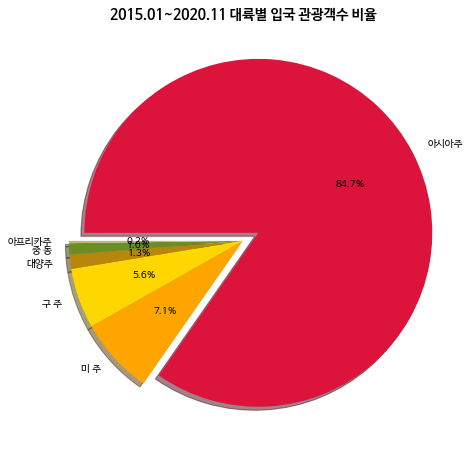

In [ ]:
# 파이차트를 활용한 시각화

explode_c = [0.1, 0, 0, 0, 0, 0]
color_c = ['crimson','orange','gold','darkgoldenrod','olivedrab','darkkhaki']

plt.figure(figsize=(8,8))
plt.title('2015.01~2020.11 대륙별 입국 관광객수 비율', 
          fontdict={'fontsize':14, 'fontweight':'bold'}, pad=5)
plt.pie(tour_cont.계, labels=tour_cont.index, autopct='%.1f%%', 
        startangle=180, counterclock=False, shadow=True, 
        colors=color_c, explode=explode_c)
plt.show()

### 2. 전체 기간동안 관광목적 입국자수 비율이 가장 높은 '아시아주'를 중심으로 분석.

In [ ]:
# 아시아주 데이터 뽑아오기
tour_a = tour.iloc[1:18,1:]
tour_a

,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,2015년10월,...,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월,계
국적,,,,,,,,,,,,,,,,,,,,,
일 본,131909,134366,211846,147108,176044,93726,74890,137125,150080,172411,...,6478,58,45,73,44,25,29,37,32,12629058
인 도,1824,1442,1945,2413,2983,2151,2054,2372,2405,3290,...,555,46,95,865,1256,414,600,510,438,184938
베트남,3254,4371,8708,13759,8596,5114,3654,5973,8104,12238,...,941,420,70,61,157,59,97,92,102,1223559
미얀마,1123,1154,1321,2089,1368,1147,1046,1078,1305,1494,...,741,41,178,308,951,818,1430,1358,1252,99242
몽 골,5090,4129,4290,5016,6580,6932,4728,4225,4855,6376,...,191,60,0,11,12,20,53,23,58,410273
스리랑카,120,134,215,277,277,202,184,281,325,385,...,20,29,39,72,84,11,34,30,10,16878
파키스탄,143,151,303,315,337,267,235,340,343,460,...,70,6,0,9,10,8,7,8,1,19635
방글라데시,96,130,160,231,262,154,160,170,238,244,...,77,2,0,17,65,30,25,32,12,15156
중 국,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,...,5040,522,179,246,258,212,481,367,382,23822955


In [ ]:
# 히트맵용 데이터프레임 만들기
a_heat = tour_a.iloc[:,:-1]

In [ ]:
a_heat.dtypes

2015년01월    object
2015년02월    object
2015년03월    object
2015년04월    object
2015년05월    object
2015년06월    object
2015년07월    object
2015년08월    object
2015년09월    object
2015년10월    object
2015년11월    object
2015년12월    object
2016년01월    object
2016년02월    object
2016년03월    object
2016년04월    object
2016년05월    object
2016년06월    object
2016년07월    object
2016년08월    object
2016년09월    object
2016년10월    object
2016년11월    object
2016년12월    object
2017년01월    object
2017년02월    object
2017년03월    object
2017년04월    object
2017년05월    object
2017년06월    object
             ...  
2018년06월    object
2018년07월    object
2018년08월    object
2018년09월    object
2018년10월    object
2018년11월    object
2018년12월    object
2019년01월    object
2019년02월    object
2019년03월    object
2019년04월    object
2019년05월    object
2019년06월    object
2019년07월    object
2019년08월    object
2019년09월    object
2019년10월    object
2019년11월    object
2019년12월    object
2020년01월    object
2020년02월    object
2020년03월    

In [ ]:
a_heat = a_heat.apply(pd.to_numeric)
a_heat.dtypes

2015년01월    int64
2015년02월    int64
2015년03월    int64
2015년04월    int64
2015년05월    int64
2015년06월    int64
2015년07월    int64
2015년08월    int64
2015년09월    int64
2015년10월    int64
2015년11월    int64
2015년12월    int64
2016년01월    int64
2016년02월    int64
2016년03월    int64
2016년04월    int64
2016년05월    int64
2016년06월    int64
2016년07월    int64
2016년08월    int64
2016년09월    int64
2016년10월    int64
2016년11월    int64
2016년12월    int64
2017년01월    int64
2017년02월    int64
2017년03월    int64
2017년04월    int64
2017년05월    int64
2017년06월    int64
            ...  
2018년06월    int64
2018년07월    int64
2018년08월    int64
2018년09월    int64
2018년10월    int64
2018년11월    int64
2018년12월    int64
2019년01월    int64
2019년02월    int64
2019년03월    int64
2019년04월    int64
2019년05월    int64
2019년06월    int64
2019년07월    int64
2019년08월    int64
2019년09월    int64
2019년10월    int64
2019년11월    int64
2019년12월    int64
2020년01월    int64
2020년02월    int64
2020년03월    int64
2020년04월    int64
2020년05월    int64
2020년06월  

In [ ]:
# 효과적인 히트맵 시각화를 위해 단위 조정(by 정규화)

x = a_heat.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
a_norm = pd.DataFrame(x_scaled, columns=a_heat.columns, index=a_heat.index)
a_norm.head()

,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,2015년10월,...,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월
국적,,,,,,,,,,,,,,,,,,,,,
일 본,0.402939,0.325053,0.548088,0.273924,0.340075,0.419705,0.434692,0.367349,0.330462,0.332108,...,1.000000,1.000000,0.098246,0.062069,0.040684,0.014920,0.016775,0.014714,0.016038,0.013920
인 도,0.005282,0.003177,0.004622,0.004069,0.005264,0.008957,0.011017,0.005906,0.004779,0.005876,...,0.009498,0.082843,0.077193,0.131034,0.507665,0.435461,0.379310,0.337861,0.239151,0.196228
베트남,0.009654,0.010270,0.022132,0.025230,0.016123,0.022247,0.020324,0.015565,0.017348,0.023136,...,0.044326,0.142614,0.733333,0.096552,0.033608,0.054129,0.048462,0.053198,0.041981,0.045352
미얀마,0.003139,0.002480,0.003006,0.003465,0.002140,0.004454,0.005154,0.002435,0.002353,0.002411,...,0.005642,0.111644,0.068421,0.245517,0.179245,0.329632,0.755825,0.807583,0.639151,0.561742
몽 골,0.015266,0.009684,0.010693,0.008924,0.012223,0.030402,0.026571,0.010877,0.010182,0.011829,...,0.024867,0.026479,0.101754,0.000000,0.004127,0.003817,0.012116,0.028297,0.009434,0.025595


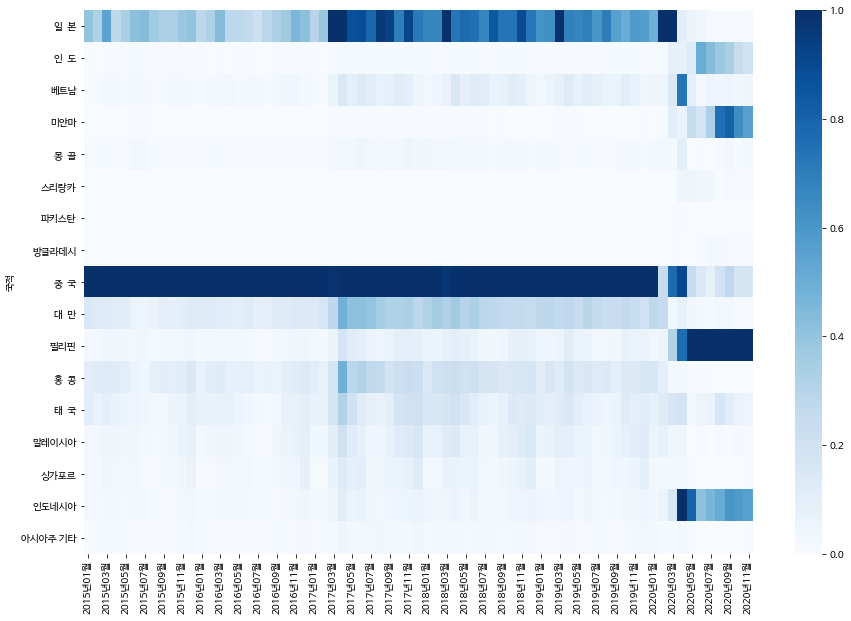

In [ ]:
# 정규화한 데이터로 히트맵 그려보기 -> 각 월별 최대최소 분포가 잘 드러난다.

plt.figure(figsize=(15,10))
sns.heatmap(a_norm, cmap='Blues')
plt.show()

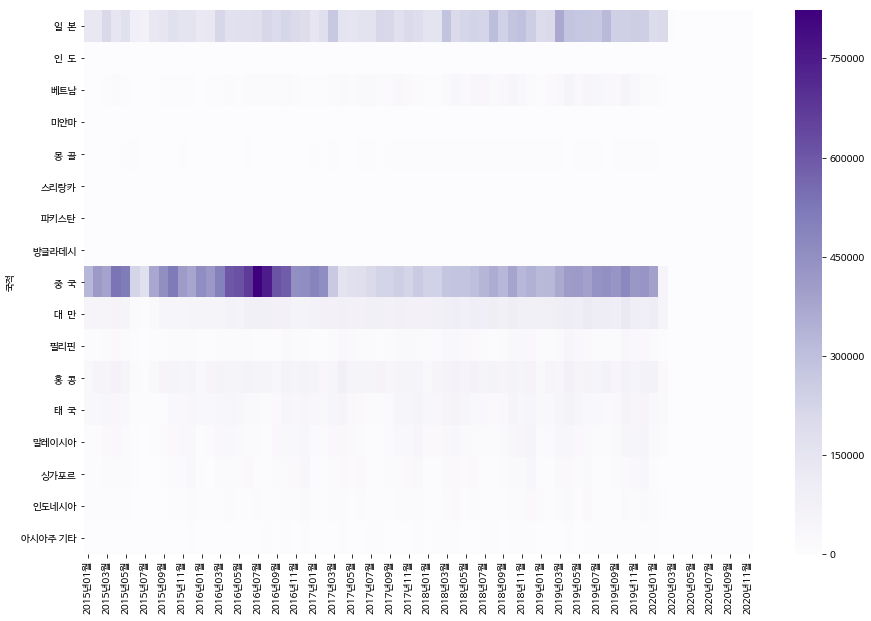

In [ ]:
# 참고: 정규화 이전 기존 데이터를 활용한 히트맵 시각화 -> 전체 기간에 대한 개별 국가의 분포를 파악하기 좋다.
plt.figure(figsize=(15,10))
sns.heatmap(a_heat, cmap='Purples')
plt.show()

In [ ]:
# 효과적인 파이차트 시각화를 위한 내림차순 정렬
tour_a.sort_values(by='계', ascending=False, inplace=True)
tour_a.head()

,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,2015년10월,...,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월,계
국적,,,,,,,,,,,,,,,,,,,,,
중 국,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,...,5040,522,179,246,258,212,481,367,382,23822955
일 본,131909,134366,211846,147108,176044,93726,74890,137125,150080,172411,...,6478,58,45,73,44,25,29,37,32,12629058
대 만,48909,52425,51302,59129,57080,13892,9232,24095,45182,48039,...,274,48,31,40,47,41,60,34,42,4723543
홍 콩,34672,49996,50969,66444,52999,12968,7169,32775,50571,52709,...,173,17,6,13,15,10,9,7,3,3230849
태 국,34814,29581,40726,38391,29654,11981,6563,8189,10719,30011,...,1059,107,25,92,189,185,197,152,120,2158528


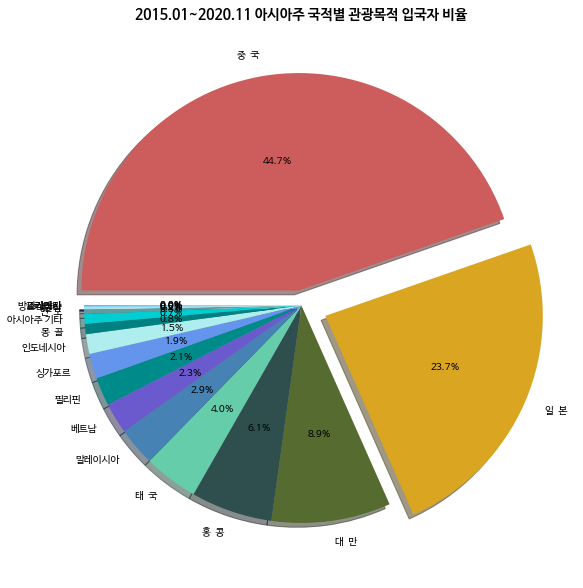

In [ ]:
explode_a = [0.07, 0.12, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
color_a = ['indianred','goldenrod','darkolivegreen','darkslategray','mediumaquamarine',
           'steelblue','slateblue','darkcyan','cornflowerblue','paleturquoise','teal',
           'darkturquoise','cadetblue','powderblue','deepskyblue','lightskyblue','mediumblue']

plt.figure(figsize=(10,10))
plt.title('2015.01~2020.11 아시아주 국적별 관광목적 입국자 비율', 
          fontdict={'fontsize':14, 'fontweight':'bold'}, pad=15)
plt.pie(tour_a.계, labels=tour_a.index, autopct='%.1f%%', 
        startangle=180, counterclock=False, shadow=True,
        colors=color_a, explode=explode_a)
plt.show()

### 3. 위와 같은 분석 결과에 따라, 아시아주 관광객의 2/3 이상을 차지하는 '중국'과 '일본' 데이터를 분석 대상으로 함.

In [ ]:
tour_cj = tour_a.iloc[:2,:-1]
tour_cj

,2015년01월,2015년02월,2015년03월,2015년04월,2015년05월,2015년06월,2015년07월,2015년08월,2015년09월,2015년10월,...,2020년02월,2020년03월,2020년04월,2020년05월,2020년06월,2020년07월,2020년08월,2020년09월,2020년10월,2020년11월
국적,,,,,,,,,,,,,,,,,,,,,
중 국,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,...,49520,5040,522,179,246,258,212,481,367,382
일 본,131909,134366,211846,147108,176044,93726,74890,137125,150080,172411,...,205007,6478,58,45,73,44,25,29,37,32


In [ ]:
tour_cj = tour_cj.T
tour_cj

국적,중 국,일 본
2015년01월,327225,131909
2015년02월,413096,134366
2015년03월,386386,211846
2015년04월,536428,147108
2015년05월,517154,176044
2015년06월,223101,93726
2015년07월,172075,74890
2015년08월,372990,137125
2015년09월,453670,150080
2015년10월,518651,172411


In [ ]:
# 시계열자료 특성 넣기
time = pd.date_range('01/01/2015', periods=71, freq='M')
tour_cj['time'] = time
tour_cj

국적,중 국,일 본,time
2015년01월,327225,131909,2015-01-31
2015년02월,413096,134366,2015-02-28
2015년03월,386386,211846,2015-03-31
2015년04월,536428,147108,2015-04-30
2015년05월,517154,176044,2015-05-31
2015년06월,223101,93726,2015-06-30
2015년07월,172075,74890,2015-07-31
2015년08월,372990,137125,2015-08-31
2015년09월,453670,150080,2015-09-30
2015년10월,518651,172411,2015-10-31


In [ ]:
tour_cj['year'] = tour_cj['time'].dt.year
tour_cj['month'] = tour_cj['time'].dt.month

tour_cj

국적,중 국,일 본,time,year,month
2015년01월,327225,131909,2015-01-31,2015,1
2015년02월,413096,134366,2015-02-28,2015,2
2015년03월,386386,211846,2015-03-31,2015,3
2015년04월,536428,147108,2015-04-30,2015,4
2015년05월,517154,176044,2015-05-31,2015,5
2015년06월,223101,93726,2015-06-30,2015,6
2015년07월,172075,74890,2015-07-31,2015,7
2015년08월,372990,137125,2015-08-31,2015,8
2015년09월,453670,150080,2015-09-30,2015,9
2015년10월,518651,172411,2015-10-31,2015,10


In [ ]:
tour_cj.index = tour_cj['time']

In [ ]:
tour_cj.columns

Index(['중  국', '일  본', 'time', 'year', 'month'], dtype='object', name='국적')

In [ ]:
# 컬럼명의 공백 제거
tour_cj.columns = ['중국','일본','time','year','month']

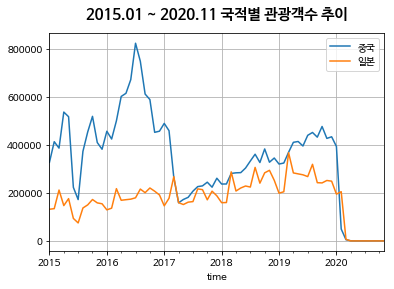

<Figure size 720x720 with 0 Axes>

In [ ]:
# 전체 기간 동안의 추세를 보여주는 시계열 그래프 그리기

tour_cj.loc[:,['중국','일본']].plot()


plt.title("2015.01 ~ 2020.11 국적별 관광객수 추이", 
          fontdict = { 'fontsize' : 15, 'fontweight' : 'bold'}, pad = 15)
plt.grid()
plt.show()

### 4. 중국과 일본 관광객 데이터를 활용한 다양한 분석 및 시각화

time
2015-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2016-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2017-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2018-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2019-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
2020-01-01    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: AS-JAN, dtype: object

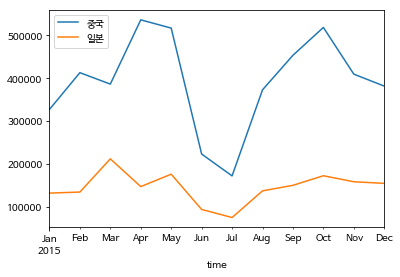

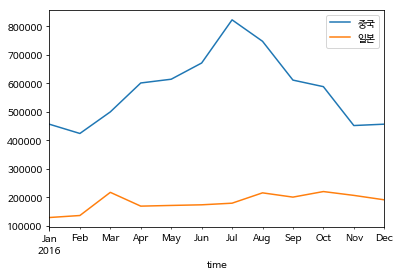

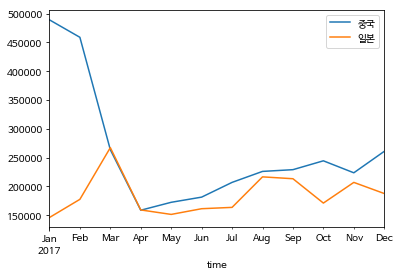

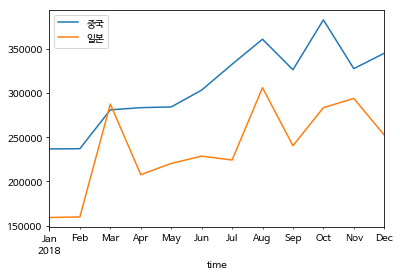

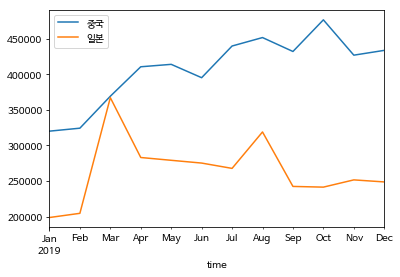

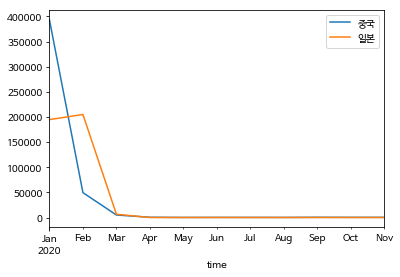

In [ ]:
# 세부 연도별 그래프 그리기
tour_cj.loc['2015-1-1':'2020-12-31'].resample('YS')['중국','일본'].plot()

In [ ]:
t_2015 = tour_cj[tour_cj['year']==2015]
t_2016 = tour_cj[tour_cj['year']==2016]
t_2017 = tour_cj[tour_cj['year']==2017]
t_2018 = tour_cj[tour_cj['year']==2018]
t_2019 = tour_cj[tour_cj['year']==2019]
t_2020 = tour_cj[tour_cj['year']==2020]

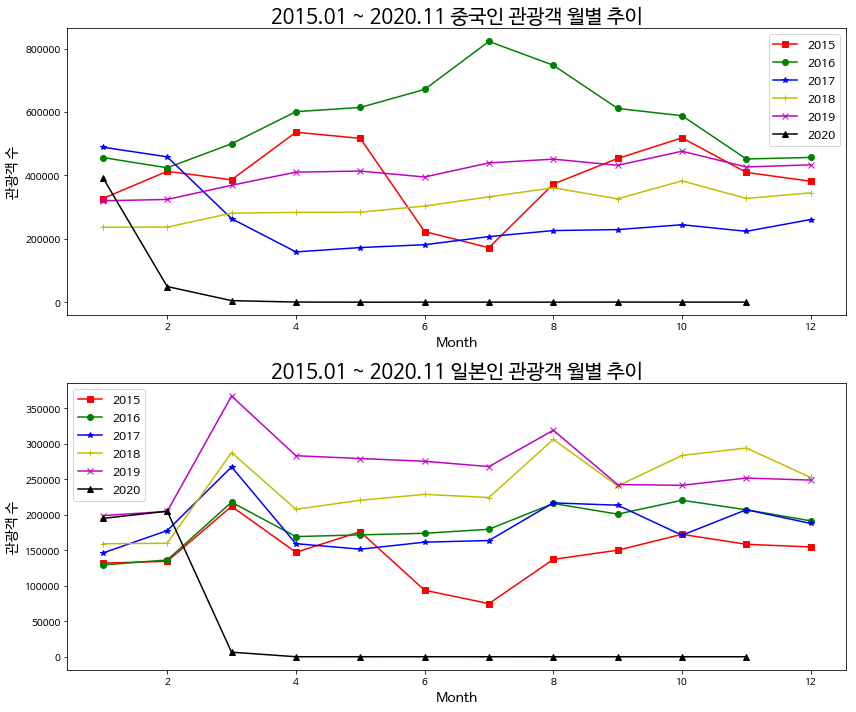

In [ ]:
# Line Graph by matplotlib with wide-form DataFrame
fig, axes= plt.subplots(nrows=2, ncols=1, figsize=(12,10))

# 중국
axes[0].plot(t_2015.month, t_2015.중국, marker='s', color='r')
axes[0].plot(t_2016.month, t_2016.중국, marker='o', color='g')
axes[0].plot(t_2017.month, t_2017.중국, marker='*', color='b')
axes[0].plot(t_2018.month, t_2018.중국, marker='+', color='y')
axes[0].plot(t_2019.month, t_2019.중국, marker='x', color='m')
axes[0].plot(t_2020.month, t_2020.중국, marker='^', color='k')

axes[0].set_title('2015.01 ~ 2020.11 중국인 관광객 월별 추이', fontsize=20) 
axes[0].set_ylabel('관광객 수', fontsize=14)
axes[0].set_xlabel('Month', fontsize=14)
axes[0].legend([2015,2016,2017,2018,2019,2020], fontsize=12, loc='best')

# 일본
axes[1].plot(t_2015.month, t_2015.일본, marker='s', color='r')
axes[1].plot(t_2016.month, t_2016.일본, marker='o', color='g')
axes[1].plot(t_2017.month, t_2017.일본, marker='*', color='b')
axes[1].plot(t_2018.month, t_2018.일본, marker='+', color='y')
axes[1].plot(t_2019.month, t_2019.일본, marker='x', color='m')
axes[1].plot(t_2020.month, t_2020.일본, marker='^', color='k')

axes[1].set_title('2015.01 ~ 2020.11 일본인 관광객 월별 추이', fontsize=20) 
axes[1].set_ylabel('관광객 수', fontsize=14)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].legend([2015,2016,2017,2018,2019,2020],fontsize=12, loc='best')

plt.tight_layout()
plt.show()

In [ ]:
tour_cj['중국_백분위'] = tour_cj['중국']/(tour_cj['중국']+tour_cj['일본'])*100
tour_cj['일본_백분위'] = 100 - tour_cj['중국_백분위']

tour_cj

,중국,일본,time,year,month,중국_백분위,일본_백분위
time,,,,,,,
2015-01-31,327225,131909,2015-01-31,2015,1,71.27,28.73
2015-02-28,413096,134366,2015-02-28,2015,2,75.4566,24.5434
2015-03-31,386386,211846,2015-03-31,2015,3,64.588,35.412
2015-04-30,536428,147108,2015-04-30,2015,4,78.4784,21.5216
2015-05-31,517154,176044,2015-05-31,2015,5,74.6041,25.3959
2015-06-30,223101,93726,2015-06-30,2015,6,70.4173,29.5827
2015-07-31,172075,74890,2015-07-31,2015,7,69.6759,30.3241
2015-08-31,372990,137125,2015-08-31,2015,8,73.1188,26.8812
2015-09-30,453670,150080,2015-09-30,2015,9,75.142,24.858


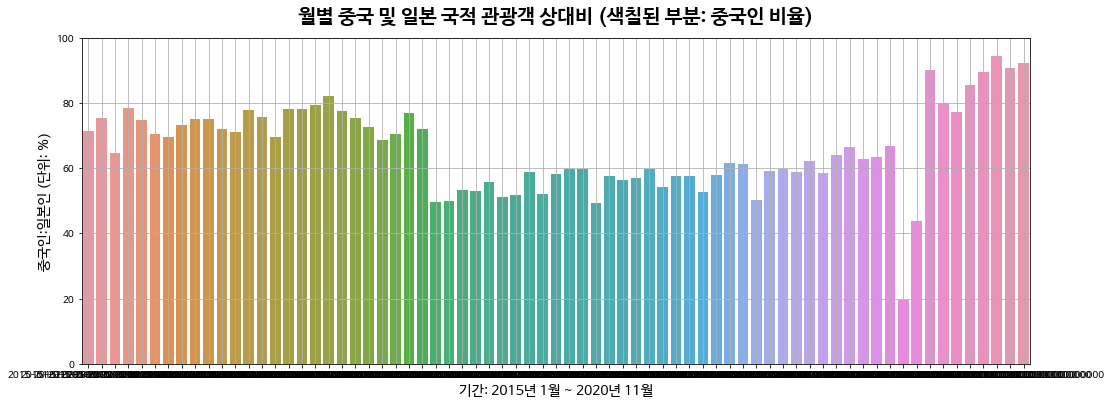

In [ ]:
plt.figure(figsize=(17,6))
sns.barplot(x=tour_cj.index, y='중국_백분위', data=tour_cj)
plt.title('월별 중국 및 일본 국적 관광객 상대비 (색칠된 부분: 중국인 비율)', 
          fontsize='20', fontweight='bold', pad=15)
plt.axis(ymax=100)
plt.ylabel('중국인:일본인 (단위: %)', fontsize=14)
plt.xlabel('기간: 2015년 1월 ~ 2020년 11월', fontsize=14)
plt.grid()
plt.show()

### 5. 국가간 주요 이슈별 관광객 변화 분석

> 1. 2015년 5월21일 사우디, 바레인 방문한 68세 남성 첫 메르스 확진, 한달가량 총 감염자 186명 발생

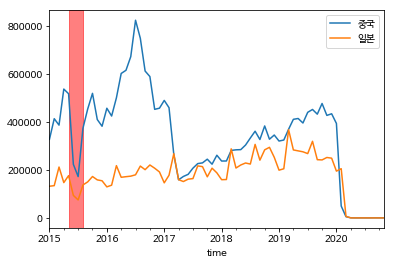

In [ ]:
thisplot = tour_cj.loc[:,['중국','일본']].plot()

plt.axvspan('2015-05-31', '2015-08-31', color='red', alpha=0.5)
plt.show()

> 2. 중국에서는 35만명 가량, 일본에서는 7만명 가량 감소 / 감소율은 중국 약 70%, 일본 50%로 매우 심각

Text(0.5, 1.0, '메르스 발병 전 대비 감소율')

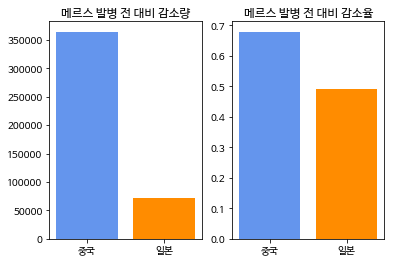

In [ ]:
downchn = tour_cj.loc['2015-04-30','중국'] - tour_cj.loc['2015-07-31','중국']
downjpn = tour_cj.loc['2015-04-30','일본'] - tour_cj.loc['2015-07-31','일본']

fig = plt.figure()

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

메르스감소국가명 = ['중국', '일본']
감소량 = [downchn, downjpn]
ax1.bar(메르스감소국가명, 감소량, color=['cornflowerblue', 'darkorange'])
ax1.set_title("메르스 발병 전 대비 감소량")

메르스감소국가명 = ['중국', '일본']
원래값중국 = tour_cj.loc['2015-04-30','중국']
원래값일본 = tour_cj.loc['2015-04-30','일본']

중국감소율 = downchn/원래값중국
일본감소율 = downjpn/원래값일본
감소율 = [중국감소율,일본감소율]

ax2.bar(메르스감소국가명, 감소율, color=['cornflowerblue', 'darkorange'])
ax2.set_title("메르스 발병 전 대비 감소율")

In [ ]:
print(감소율)

[0.6792206969062018, 0.4909182369415667]


> 3. 2016년 7월 8일 사드배치 공식 발표, 2017년 화해 제스쳐 까지 중국 관광객수 추이

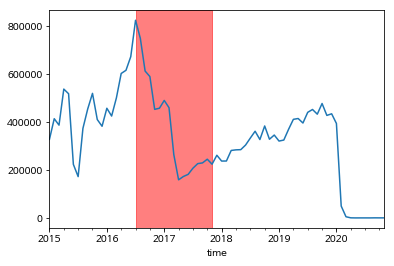

In [ ]:
thisplot = tour_cj.loc[:,'중국'].plot()
plt.axvspan('2016-07-31', '2017-11-30', color='red', alpha=0.5)
plt.show()

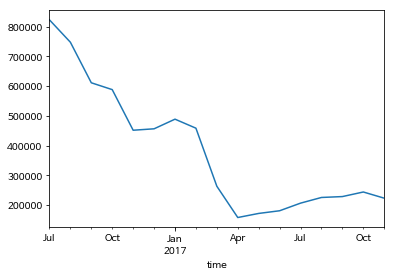

In [ ]:
ax = tour_cj.iloc[18:35,0].plot()

> 4. 2019.7월 1일 일본과 무역마찰, 약 3개월간의 추이

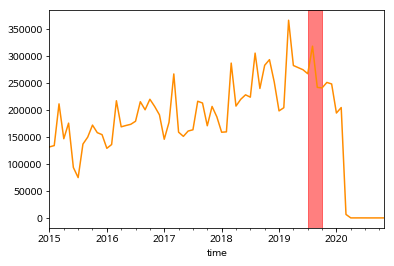

In [ ]:
thisplot = tour_cj.loc[:,'일본'].plot(color='darkorange')
plt.axvspan('2019-07-31', '2019-10-31', color='red', alpha=0.5)
plt.show()

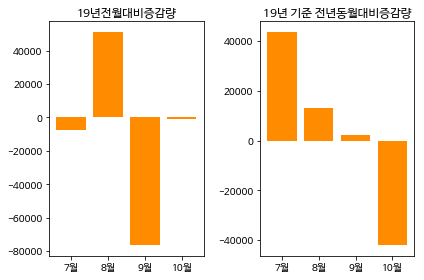

In [ ]:
jpn1 = tour_cj.loc['2019-07-31','일본'] - tour_cj.loc['2019-06-30','일본']
jpn2 = tour_cj.loc['2019-08-31','일본'] - tour_cj.loc['2019-07-31','일본']
jpn3 = tour_cj.loc['2019-09-30','일본'] - tour_cj.loc['2019-08-31','일본']
jpn4 = tour_cj.loc['2019-10-31','일본'] - tour_cj.loc['2019-09-30','일본']

fig = plt.figure()

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

전월대비증감량 = ['7월', '8월', '9월', '10월']
증감량 = [jpn1,jpn2,jpn3,jpn4]
ax1.bar(전월대비증감량, 증감량, color='darkorange')
ax1.set_title("19년전월대비증감량")

jpn11 = tour_cj.loc['2019-07-31','일본'] - tour_cj.loc['2018-07-31','일본']
jpn22 = tour_cj.loc['2019-08-31','일본'] - tour_cj.loc['2018-08-31','일본']
jpn33 = tour_cj.loc['2019-09-30','일본'] - tour_cj.loc['2018-09-30','일본']
jpn44 = tour_cj.loc['2019-10-31','일본'] - tour_cj.loc['2018-10-31','일본']

전년동월대비증감량 = ['7월', '8월', '9월', '10월']
증감량 = [jpn11,jpn22,jpn33,jpn44]
ax2.bar(전년동월대비증감량, 증감량, color='darkorange')
ax2.set_title("19년 기준 전년동월대비증감량")

plt.tight_layout()
plt.show()

> 5. 2020년 1월20일 중국 우한시에서 입국한 중국 국적의 35세 여성 첫 코로나 19 확진

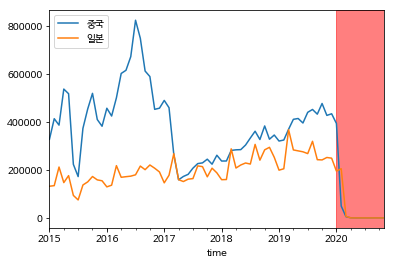

In [ ]:
thisplot = tour_cj.loc[:,['중국','일본']].plot()
plt.axvspan('2020-01-31', '2020-11-30', color='red', alpha=0.5)
plt.show()

> 코로나19로 인한 관광객 감소효과 / 유의한 감소폭을 보였던 메르스, 사드배치 갈등 시기 관광객수와 20년도 동월 관광객수 비교

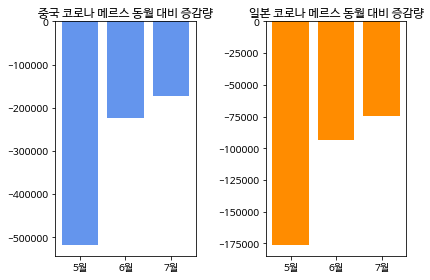

In [ ]:
# (1) 메르스: 2015.5.31~2015.8.31

cor_mer_cn5 = tour_cj.loc['2020-05-31','중국'] - tour_cj.loc['2015-05-31','중국']
cor_mer_cn6 = tour_cj.loc['2020-06-30','중국'] - tour_cj.loc['2015-06-30','중국']
cor_mer_cn7 = tour_cj.loc['2020-07-31','중국'] - tour_cj.loc['2015-07-31','중국']

cor_mer_jp5 = tour_cj.loc['2020-05-31','일본'] - tour_cj.loc['2015-05-31','일본']
cor_mer_jp6 = tour_cj.loc['2020-06-30','일본'] - tour_cj.loc['2015-06-30','일본']
cor_mer_jp7 = tour_cj.loc['2020-07-31','일본'] - tour_cj.loc['2015-07-31','일본']

fig = plt.figure()

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

코로나메르스동월대비증감량 = ['5월', '6월', '7월']
증감량 = [cor_mer_cn5,cor_mer_cn6,cor_mer_cn7]
ax1.bar(코로나메르스동월대비증감량, 증감량, color='cornflowerblue')
ax1.set_title("중국 코로나 메르스 동월 대비 증감량")

코로나메르스동월대비증감량 = ['5월', '6월', '7월']
증감량 = [cor_mer_jp5,cor_mer_jp6,cor_mer_jp7]
ax2.bar(코로나메르스동월대비증감량, 증감량, color='darkorange')
ax2.set_title("일본 코로나 메르스 동월 대비 증감량")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, '코로나 vs 금한령 동월 대비 증감량')

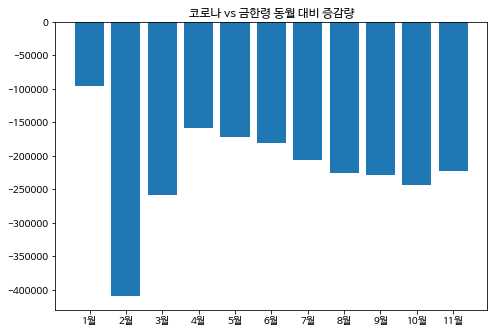

In [ ]:
# (2) 사드갈등: 2016.7.31 ~ 2017.11.30

cor_ban_cn1 = tour_cj.loc['2020-01-31','중국'] - tour_cj.loc['2017-01-31','중국']
cor_ban_cn2 = tour_cj.loc['2020-02-29','중국'] - tour_cj.loc['2017-02-28','중국']
cor_ban_cn3 = tour_cj.loc['2020-03-31','중국'] - tour_cj.loc['2017-03-31','중국']
cor_ban_cn4 = tour_cj.loc['2020-04-30','중국'] - tour_cj.loc['2017-04-30','중국']
cor_ban_cn5 = tour_cj.loc['2020-05-31','중국'] - tour_cj.loc['2017-05-31','중국']
cor_ban_cn6 = tour_cj.loc['2020-06-30','중국'] - tour_cj.loc['2017-06-30','중국']
cor_ban_cn7 = tour_cj.loc['2020-07-31','중국'] - tour_cj.loc['2017-07-31','중국']
cor_ban_cn8 = tour_cj.loc['2020-08-31','중국'] - tour_cj.loc['2017-08-31','중국']
cor_ban_cn9 = tour_cj.loc['2020-09-30','중국'] - tour_cj.loc['2017-09-30','중국']
cor_ban_cn10 = tour_cj.loc['2020-10-31','중국'] - tour_cj.loc['2017-10-31','중국']
cor_ban_cn11 = tour_cj.loc['2020-11-30','중국'] - tour_cj.loc['2017-11-30','중국']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
코로나중국금한령동월대비증감량 = ['1월', '2월', '3월', '4월','5월', '6월', '7월', '8월', '9월', '10월', '11월']
증감량 = [cor_ban_cn1, cor_ban_cn2, cor_ban_cn3, cor_ban_cn4, cor_ban_cn5, cor_ban_cn6, 
         cor_ban_cn7, cor_ban_cn8, cor_ban_cn9, cor_ban_cn10,cor_ban_cn11]
ax.bar(코로나중국금한령동월대비증감량, 증감량)
ax.set_title("코로나 vs 금한령 동월 대비 증감량")

### [부록] 웹크롤링 & 워드클라우드

> 1. 메르스 감염(2015년5월-2015년8월)

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import datetime
import os
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import ImageColorGenerator

In [ ]:
query = input('검색 키워드를 입력하세요 : ') # 중국+관광
query = query.replace(' ', '+') 

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : ')) #1500

검색 키워드를 입력하세요 : 중국+관광
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 1500


In [ ]:
# 메르스 감염

start_dt = datetime.datetime.strptime('2015.05.31', '%Y.%m.%d')
last_dt = datetime.datetime.strptime('2015.08.31', '%Y.%m.%d')

ds = start_dt.strftime('%Y.%m.%d')
de = last_dt.strftime('%Y.%m.%d')

news_url = 'https://search.naver.com/search.naver?where=news&query={0}&sm=tab_opt&sort=0&field=0&reporter_article=&pd=3&ds={1}&de={2}'.format(query,ds,de)

req = requests.get(news_url)
soup = BeautifulSoup(req.text, 'html.parser')

In [ ]:
news_dict = {} 
idx = 0 
cur_page = 1

In [ ]:
print()
print('크롤링 중...')

date_text = []
while idx < news_num:
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...


In [ ]:
print('크롤링 완료')
print('데이터프레임 변환')
news_df = pd.DataFrame(news_dict).T
news_df.head()

크롤링 완료
데이터프레임 변환


,title,url
0,"호텔신라, 상하이서 관광설명회…이부진 참석할 듯(종합)",http://app.yonhapnews.co.kr/YNA/Basic/SNS/r.as...
1,중국 상해서 대규모 한국관광 설명회 열린다,http://www.nocutnews.co.kr/news/4465615
2,"인천항만공사, 인천항 크루즈 관광 중국 마케팅 홍보",http://biz.heraldcorp.com/view.php?ud=20150831...
3,강원도 주요 관광지 150곳 무료 와이파이 '펑펑',http://news1.kr/articles/?2398860
4,"박근혜 중국 방문, 최대규모 경제사절단 동행",http://www.businesspost.co.kr/news/articleView...


In [ ]:
#숫자와 영문 제거

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

news_df['ko_text_title'] = news_df['title'].apply(lambda x : text_cleaning(x))
news_df['ko'] = news_df['ko_text_title'].str.replace('중국',"")
news_df['ko_ko'] = news_df['ko'].str.replace('관광',"")
news_df.head()

,title,url,ko_text_title,ko,ko_ko
0,"호텔신라, 상하이서 관광설명회…이부진 참석할 듯(종합)",http://app.yonhapnews.co.kr/YNA/Basic/SNS/r.as...,호텔신라 상하이서 관광설명회이부진 참석할 듯종합,호텔신라 상하이서 관광설명회이부진 참석할 듯종합,호텔신라 상하이서 설명회이부진 참석할 듯종합
1,중국 상해서 대규모 한국관광 설명회 열린다,http://www.nocutnews.co.kr/news/4465615,중국 상해서 대규모 한국관광 설명회 열린다,상해서 대규모 한국관광 설명회 열린다,상해서 대규모 한국 설명회 열린다
2,"인천항만공사, 인천항 크루즈 관광 중국 마케팅 홍보",http://biz.heraldcorp.com/view.php?ud=20150831...,인천항만공사 인천항 크루즈 관광 중국 마케팅 홍보,인천항만공사 인천항 크루즈 관광 마케팅 홍보,인천항만공사 인천항 크루즈 마케팅 홍보
3,강원도 주요 관광지 150곳 무료 와이파이 '펑펑',http://news1.kr/articles/?2398860,강원도 주요 관광지 곳 무료 와이파이 펑펑,강원도 주요 관광지 곳 무료 와이파이 펑펑,강원도 주요 지 곳 무료 와이파이 펑펑
4,"박근혜 중국 방문, 최대규모 경제사절단 동행",http://www.businesspost.co.kr/news/articleView...,박근혜 중국 방문 최대규모 경제사절단 동행,박근혜 방문 최대규모 경제사절단 동행,박근혜 방문 최대규모 경제사절단 동행


In [ ]:
title_list = news_df['ko_ko'].values.tolist()
print(len(title_list))

title_text = ''

for each_line in title_list:
    title_text = title_text + each_line + ' '

1500


In [ ]:
noun = [i for i in title_text.split(' ') if len(i)>=2]

In [ ]:
count = Counter(noun)
count

Counter({'호텔신라': 13,
         '상하이서': 10,
         '설명회이부진': 1,
         '참석할': 1,
         '듯종합': 2,
         '상해서': 1,
         '대규모': 17,
         '한국': 47,
         '설명회': 9,
         '열린다': 3,
         '인천항만공사': 4,
         '인천항': 6,
         '크루즈': 44,
         '마케팅': 7,
         '홍보': 48,
         '강원도': 4,
         '주요': 2,
         '무료': 5,
         '와이파이': 2,
         '펑펑': 1,
         '박근혜': 3,
         '방문': 34,
         '최대규모': 10,
         '경제사절단': 1,
         '동행': 1,
         '서울선언': 3,
         '박원순': 18,
         '시장': 43,
         '열혈': 1,
         '눈길': 4,
         '댄스': 1,
         '삼매경': 2,
         '스위스의': 1,
         '고육지책객': 1,
         '전용열차': 3,
         '등장': 8,
         '보물섬': 1,
         '남해': 1,
         '방송에': 1,
         '소개': 5,
         '서산시': 10,
         '서산': 5,
         '산동': 9,
         '국제박람회': 8,
         '최고': 8,
         '전시상': 4,
         '수상': 4,
         '믈라카': 1,
         '해협에서': 1,
         '만난': 1,
         '일대일로': 1,
         '글자로': 2,

In [ ]:
# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거
node_df.head(10)

,node,nodesize
0,호텔신라,13
1,상하이서,10
6,대규모,17
7,한국,47
8,설명회,9
11,인천항,6
12,크루즈,44
13,마케팅,7
14,홍보,48
17,무료,5


In [ ]:
d = {}
for a, x in node_df.values:
    d[a] = x

korea_coloring = np.array(Image.open('./우리나라2.jfif'))
image_colors = ImageColorGenerator(korea_coloring)

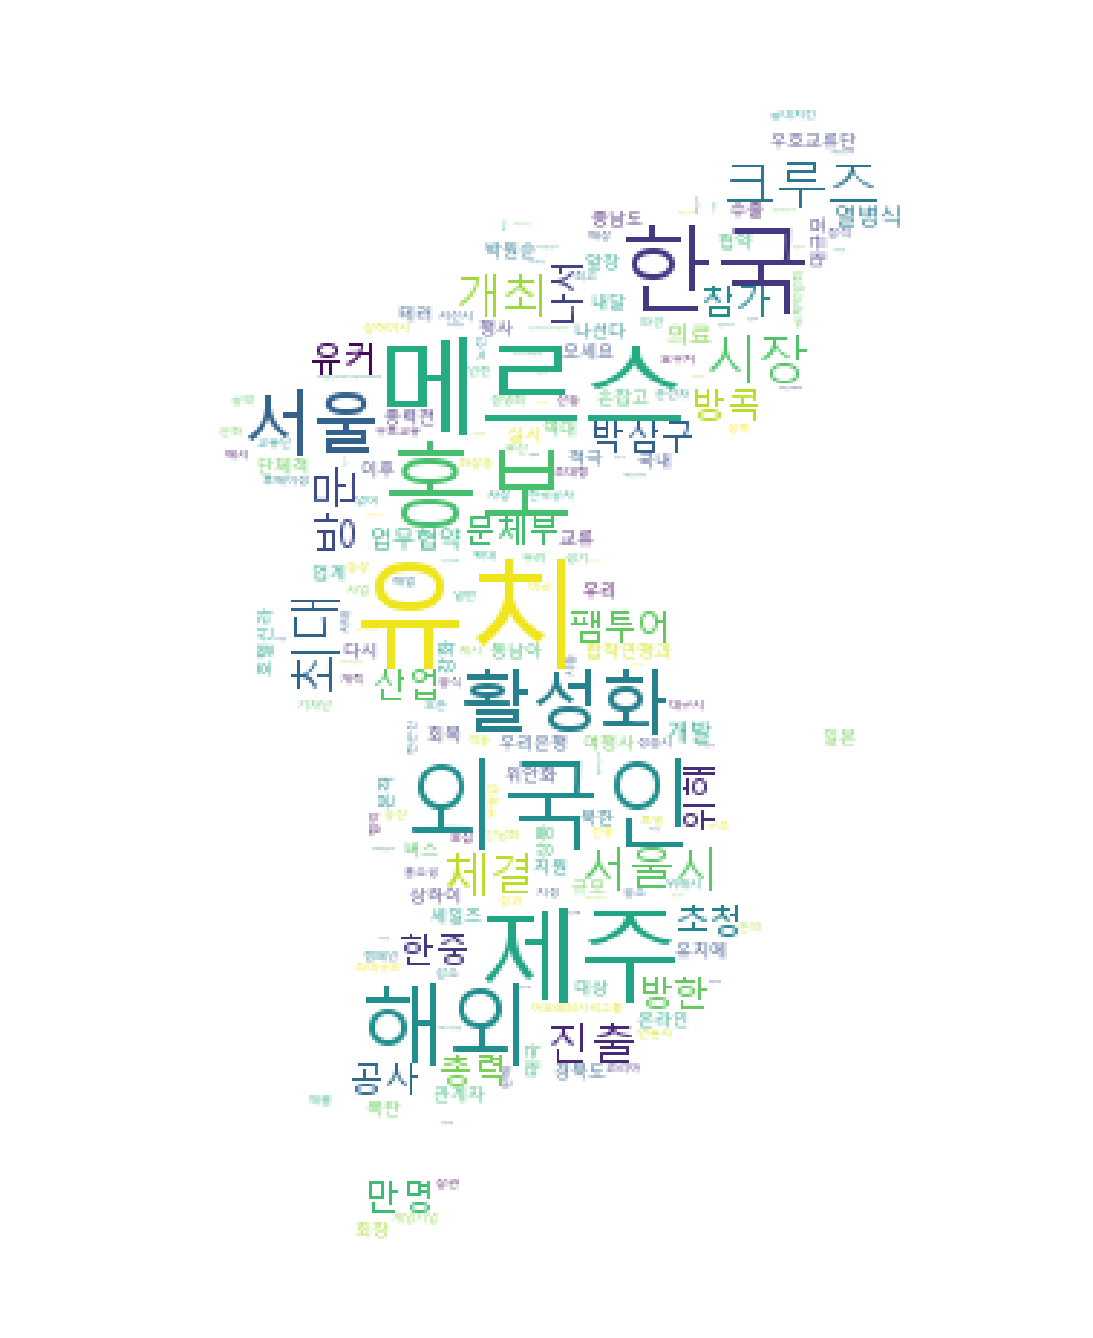

In [ ]:
#중국
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',mask=korea_coloring, background_color='white',relative_scaling=0.2, min_font_size=1,max_font_size=40)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(24,24))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

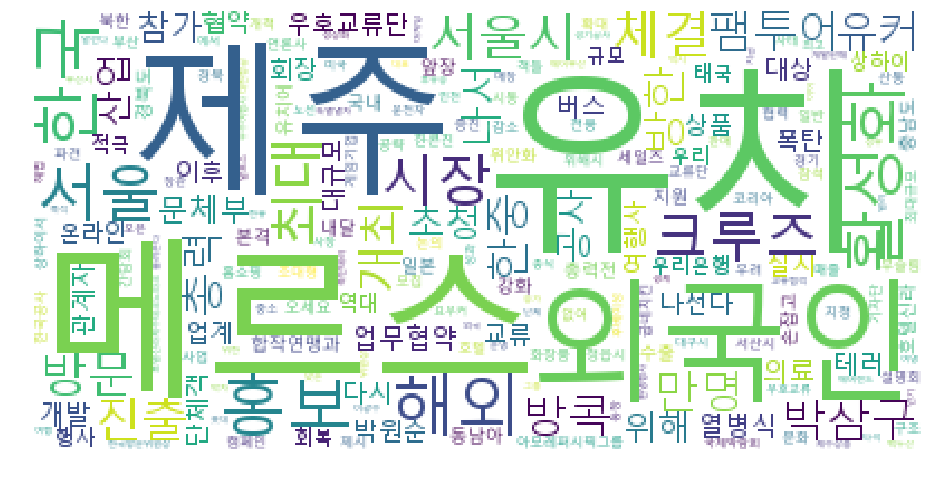

In [ ]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white',relative_scaling=0.2)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

>  2. 코로나(2020년2월~2020년 06월)

In [ ]:
query = input('검색 키워드를 입력하세요 : ') #중국+관광
query = query.replace(' ', '+') 

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : ')) #2000

검색 키워드를 입력하세요 : 중국+관광
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 2000


In [ ]:
#중국
start_dt = datetime.datetime.strptime('2020.02.01', '%Y.%m.%d')
last_dt = datetime.datetime.strptime('2020.07.30', '%Y.%m.%d')

ds = start_dt.strftime('%Y.%m.%d')
de = last_dt.strftime('%Y.%m.%d')


news_url = 'https://search.naver.com/search.naver?where=news&query={0}&sm=tab_opt&sort=0&field=0&reporter_article=&pd=3&ds={1}&de={2}'.format(query,ds,de)

req = requests.get(news_url)
soup = BeautifulSoup(req.text, 'html.parser')

In [ ]:
#중국
news_dict = {} 
idx = 0 
cur_page = 1

In [ ]:
print()
print('중국 크롤링...')

date_text = []
while idx < news_num:
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


중국 크롤링...


In [ ]:
#중국
print('크롤링 완료')
print('데이터프레임 변환')
news_df_china = pd.DataFrame(news_dict).T

크롤링 완료
데이터프레임 변환


In [ ]:
#숫자와 영문 제거

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

news_df_china['ko_text_title'] = news_df_china['title'].apply(lambda x : text_cleaning(x))
news_df_china['ko'] = news_df_china['ko_text_title'].str.replace('중국',"")
news_df_china['ko_ko'] = news_df_china['ko'].str.replace('관광',"")

In [ ]:
title_list = news_df_china['ko_ko'].values.tolist()
print(len(title_list))

title_text = ''

for each_line in title_list:
    title_text = title_text + each_line + ' '

2000


In [ ]:
noun = [i for i in title_text.split(' ') if len(i)>=2]
count_ch = Counter(noun)

In [ ]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count_ch[x] for x in count_ch if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거

In [ ]:
d = {}
for a, x in node_df.values:
    d[a] = x


korea_coloring = np.array(Image.open('./우리나라2.jfif'))
image_colors = ImageColorGenerator(korea_coloring)

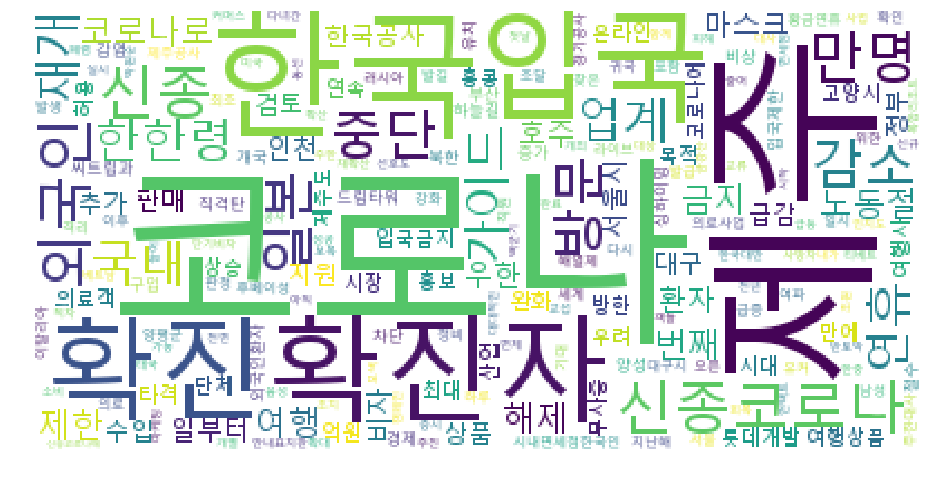

In [ ]:
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white',relative_scaling=0.2)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

> 3. 사드(2016년 7월~ 11월)

In [ ]:
query = input('검색 키워드를 입력하세요 : ') #중국+관광
query = query.replace(' ', '+') 

news_num = int(input('총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : ')) #2000

검색 키워드를 입력하세요 : 중국+관광
총 필요한 뉴스기사 수를 입력해주세요(숫자만 입력) : 2000


In [ ]:
start_dt = datetime.datetime.strptime('2016.07.31', '%Y.%m.%d')
last_dt = datetime.datetime.strptime('2016.11.30', '%Y.%m.%d')

ds = start_dt.strftime('%Y.%m.%d')
de = last_dt.strftime('%Y.%m.%d')


news_url = 'https://search.naver.com/search.naver?where=news&query={0}&sm=tab_opt&sort=0&field=0&reporter_article=&pd=3&ds={1}&de={2}'.format(query,ds,de)

req = requests.get(news_url)
soup = BeautifulSoup(req.text, 'html.parser')

In [ ]:
news_dict = {} 
idx = 0 
cur_page = 1

In [ ]:
print()
print('크롤링 중...')

date_text = []
while idx < news_num:
    
    table = soup.find('ul',{'class' : 'list_news'})
    li_list = table.find_all('li', {'id': re.compile('sp_nws.*')})
    area_list = [li.find('div', {'class' : 'news_area'}) for li in li_list]
    a_list = [area.find('a', {'class' : 'news_tit'}) for area in area_list]
    
    for n in a_list[:min(len(a_list), news_num-idx)]:
        news_dict[idx] = {'title' : n.get('title'),
                          'url' : n.get('href') }
        idx += 1

    cur_page += 1
    
    pages = soup.find('div', {'class' : 'sc_page_inner'})
    next_page_url = [p for p in pages.find_all('a') if p.text == str(cur_page)][0].get('href')
    
    req = requests.get('https://search.naver.com/search.naver' + next_page_url)
    soup = BeautifulSoup(req.text, 'html.parser')


크롤링 중...


In [ ]:
print('크롤링 완료')

print('데이터프레임 변환')
news_df = pd.DataFrame(news_dict).T

크롤링 완료
데이터프레임 변환


In [ ]:
#숫자와 영문 제거
import re

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

news_df['ko_text_title'] = news_df['title'].apply(lambda x : text_cleaning(x))
news_df['ko'] = news_df['ko_text_title'].str.replace('중국',"")
news_df['ko_ko'] = news_df['ko'].str.replace('관광',"")
news_df.head()

,title,url,ko_text_title,ko,ko_ko
0,"에이프릴, 오늘(30일) 중국 왕홍과 강남 관광 체험 팸투어",http://sports.donga.com/3/all/20161130/81593633/1,에이프릴 오늘일 중국 왕홍과 강남 관광 체험 팸투어,에이프릴 오늘일 왕홍과 강남 관광 체험 팸투어,에이프릴 오늘일 왕홍과 강남 체험 팸투어
1,"중국 의료관광 실사단, 대전 방문",http://ilyo.co.kr/?ac=article_view&entry_id=21...,중국 의료관광 실사단 대전 방문,의료관광 실사단 대전 방문,의료 실사단 대전 방문
2,"김종규 부안군수, 대중국 홍보세일즈 강화",http://view.asiae.co.kr/news/view.htm?idxno=20...,김종규 부안군수 대중국 홍보세일즈 강화,김종규 부안군수 대 홍보세일즈 강화,김종규 부안군수 대 홍보세일즈 강화
3,"수성구청, 의료관광객 유치 제대로 탄력 받아",http://www.newsway.co.kr/view.php?tp=1&ud=2016...,수성구청 의료관광객 유치 제대로 탄력 받아,수성구청 의료관광객 유치 제대로 탄력 받아,수성구청 의료객 유치 제대로 탄력 받아
4,동신대 '글로컬 관광 전문 인력' 양성,http://www.nocutnews.co.kr/news/4693484,동신대 글로컬 관광 전문 인력 양성,동신대 글로컬 관광 전문 인력 양성,동신대 글로컬 전문 인력 양성


In [ ]:
title_list = news_df['ko_ko'].values.tolist()
print(len(title_list))

2000


In [ ]:
title_text = ''

for each_line in title_list:
    title_text = title_text + each_line + ' '

In [ ]:
noun = [i for i in title_text.split(' ') if len(i)>=2]
count = Counter(noun)

In [ ]:
# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를‘node',‘nodesize'로 하여 데이터 프레임으로 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거합니다.
node_df.head(10)

,node,nodesize
3,강남,14
4,체험,6
5,팸투어,54
6,의료,29
9,방문,47
13,강화,12
15,의료객,21
16,유치,165
18,탄력,7
27,왕홍,13


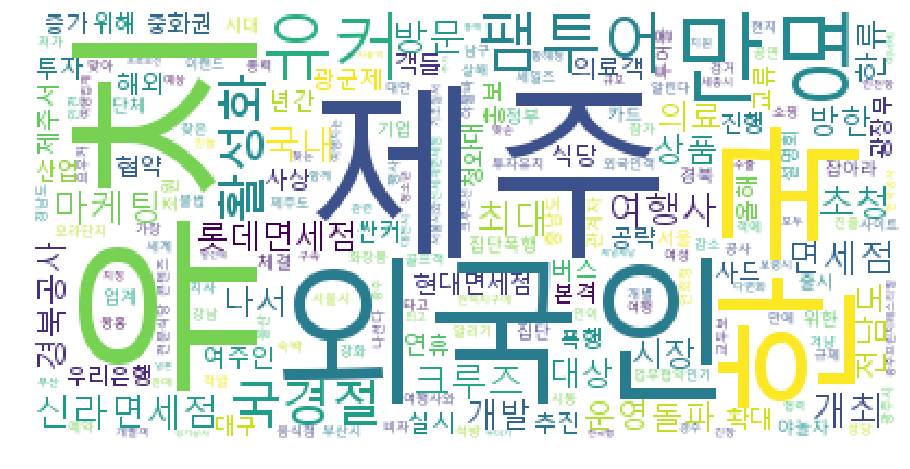

In [ ]:
d = {}
for a, x in node_df.values:
    d[a] = x

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white',relative_scaling=0.2)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()